# MNIST

In [2]:
import pandas as pd
import numpy as np
import umap.umap_ as umap
import os
import pickle
import matplotlib.pyplot as plt
import torch

In [17]:
import joblib

---
## Load data

In [2]:
from disentangling_vae.utils.datasets import get_dataloaders

In [3]:
dataloader = get_dataloaders("mnist")

---
## Load model

In [5]:
from disentangling_vae.disvae.utils.modelIO import load_model

In [6]:
model = load_model("disentangling_vae/results/btcvae_mnist")

---
## Encode data

In [45]:
df = pd.DataFrame([model(dataloader.dataset[i][0])[2].detach().numpy()[0] for i in range(len(dataloader.dataset))])

In [46]:
df['label'] = [dataloader.dataset[i][1] for i in range(len(dataloader.dataset))]

In [47]:
df

,0,1,2,3,4,5,6,7,8,9,label
0,-0.296814,0.782592,-0.021082,0.821375,-0.383268,0.209434,-0.800073,0.017685,-0.285376,-2.287505,5
1,1.619287,0.048732,0.000109,-0.154481,-0.330180,0.054826,0.609395,0.020725,-0.540505,-0.478743,0
2,0.582681,-0.003267,-0.101678,0.187104,0.091804,-3.319770,1.495584,-0.041861,2.688006,0.187891,4
3,-1.813324,-0.059967,-0.007407,-0.006620,0.026312,-0.498053,0.054220,0.010259,-1.138899,0.053447,1
4,-0.088201,0.540247,-0.036734,-0.163693,1.212245,-1.050594,-0.080898,-0.041260,0.507644,-0.010056,9
...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.145914,-0.259413,-0.007693,0.772042,0.258339,0.277109,1.078371,-0.005169,-0.651998,0.367001,8
59996,-0.069355,-0.374054,0.008342,0.876547,-0.104649,0.710935,0.808676,-0.006357,-0.643110,-0.415088,3
59997,-0.117456,0.358433,-0.017990,0.459975,0.255817,-0.012466,1.149682,-0.031103,0.073114,-1.133635,5
59998,0.403024,-0.016629,-0.011868,-1.899082,0.354962,0.047031,1.616044,0.035704,-1.011345,-0.729921,6


In [49]:
df.to_csv('mnist_latent.csv')

---
## Project data

In [10]:
df = pd.read_csv('mnist_latent.csv', index_col=0)

In [11]:
latent_coordinates = df

In [12]:
latent_coordinates

,0,1,2,3,4,5,6,7,8,9,label
0,-0.296814,0.782592,-0.021082,0.821375,-0.383268,0.209434,-0.800073,0.017685,-0.285376,-2.287505,5
1,1.619287,0.048732,0.000109,-0.154481,-0.330180,0.054826,0.609395,0.020725,-0.540505,-0.478743,0
2,0.582681,-0.003267,-0.101678,0.187104,0.091804,-3.319770,1.495584,-0.041861,2.688006,0.187891,4
3,-1.813325,-0.059967,-0.007407,-0.006620,0.026312,-0.498053,0.054220,0.010259,-1.138899,0.053447,1
4,-0.088201,0.540247,-0.036734,-0.163693,1.212245,-1.050594,-0.080898,-0.041260,0.507644,-0.010056,9
...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.145914,-0.259413,-0.007693,0.772042,0.258339,0.277109,1.078371,-0.005169,-0.651998,0.367001,8
59996,-0.069355,-0.374054,0.008342,0.876547,-0.104649,0.710935,0.808676,-0.006357,-0.643110,-0.415088,3
59997,-0.117456,0.358433,-0.017990,0.459975,0.255817,-0.012466,1.149682,-0.031103,0.073114,-1.133635,5
59998,0.403025,-0.016629,-0.011868,-1.899082,0.354962,0.047031,1.616044,0.035704,-1.011345,-0.729921,6


In [74]:
def draw_umap(n_neighbors=15, min_dist=0.1, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=2,
        metric=metric
    )
    u = fit.fit_transform(latent_coordinates)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(u[:,0], u[:,1], s=1, c=latent_coordinates['label'], alpha=0.3)
    plt.title(title, fontsize=18)

/Users/antoine/miniconda3/envs/skin-cbir/lib/python3.10/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/antoine/miniconda3/envs/skin-cbir/lib/python3.10/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/antoine/miniconda3/envs/skin-cbir/lib/python3.10/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/antoine/miniconda3/envs/skin-c

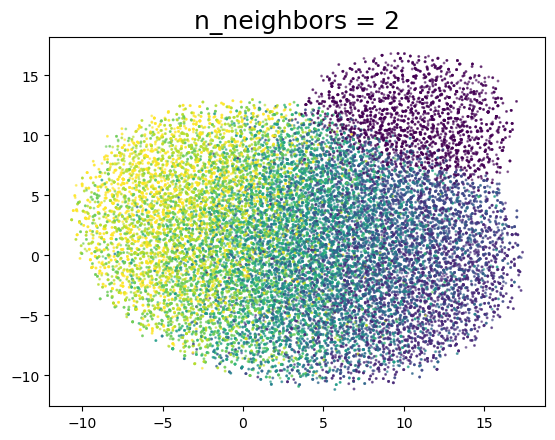

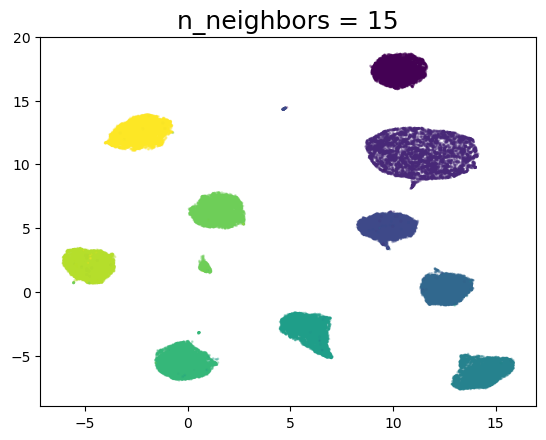

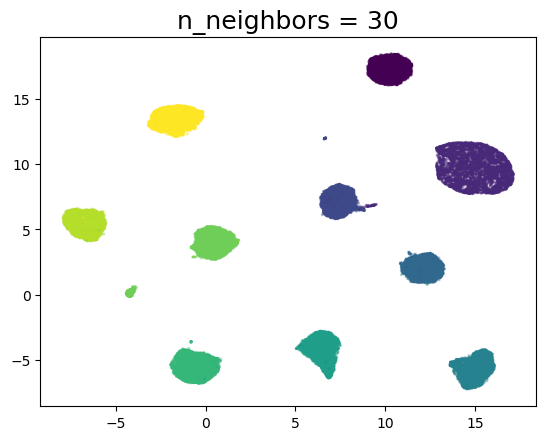

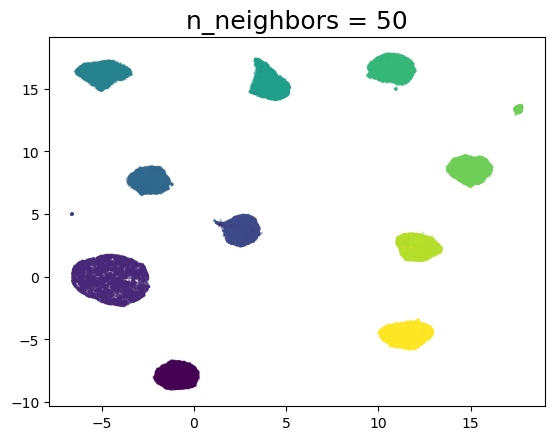

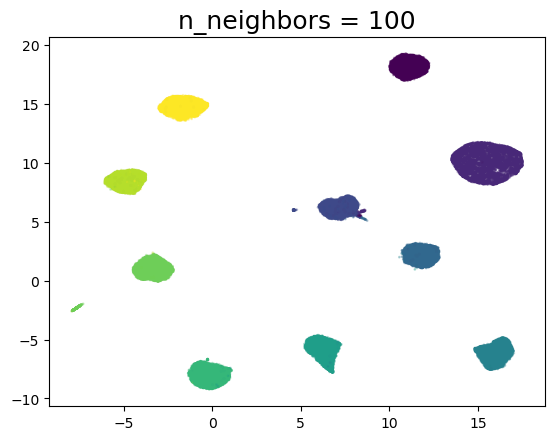

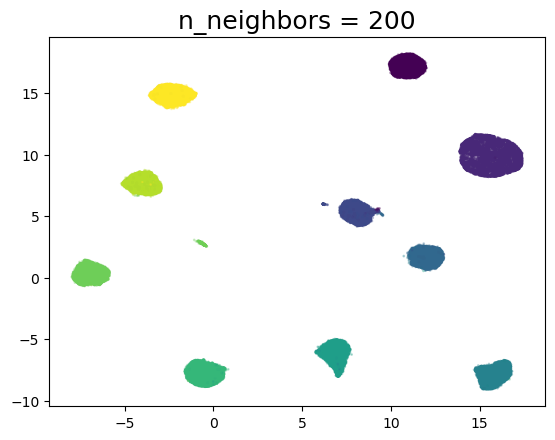

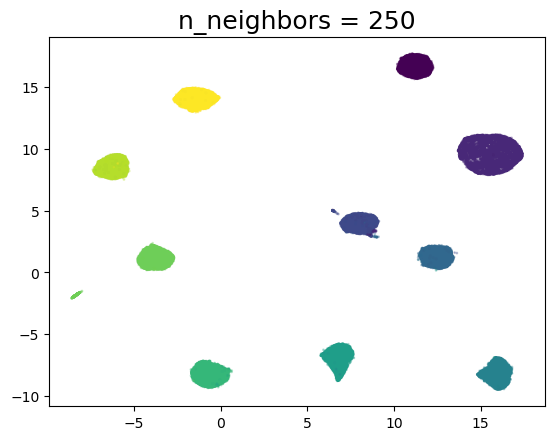

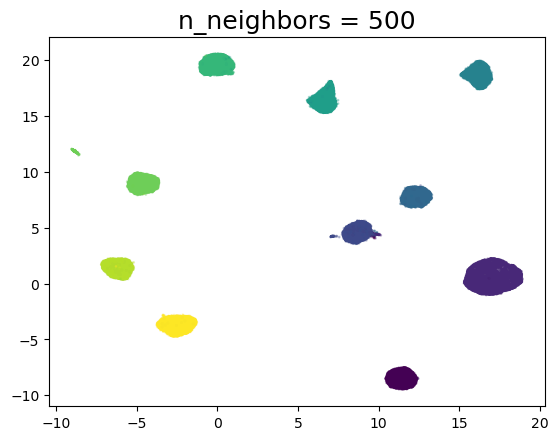

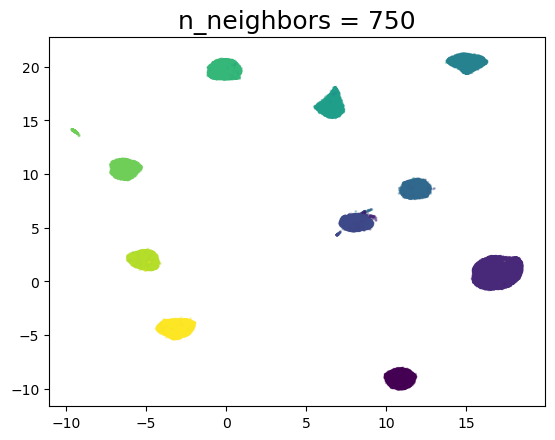

In [75]:
for n in (2, 15, 30, 50, 100, 200, 250, 500, 750):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

In [13]:
reducer = umap.UMAP(random_state=0, n_neighbors=15)
reducer = reducer.fit(latent_coordinates)

In [18]:
# Serialize UMAP model
joblib.dump(reducer, "umap_mnist.sav")

['umap_mnist.sav']

In [14]:
# Get UMAP coordinates
embeddings = reducer.transform(latent_coordinates)
df["umap1"] = embeddings[:,0]
df["umap2"] = embeddings[:,1] 

In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,label,umap1,umap2
0,-0.296814,0.782592,-0.021082,0.821375,-0.383268,0.209434,-0.800073,0.017685,-0.285376,-2.287505,5,4.448640,10.743033
1,1.619287,0.048732,0.000109,-0.154481,-0.330180,0.054826,0.609395,0.020725,-0.540505,-0.478743,0,1.399125,-6.706352
2,0.582681,-0.003267,-0.101678,0.187104,0.091804,-3.319770,1.495584,-0.041861,2.688006,0.187891,4,-0.898696,17.854614
3,-1.813325,-0.059967,-0.007407,-0.006620,0.026312,-0.498053,0.054220,0.010259,-1.138899,0.053447,1,-2.239017,-0.981830
4,-0.088201,0.540247,-0.036734,-0.163693,1.212245,-1.050594,-0.080898,-0.041260,0.507644,-0.010056,9,12.388402,-3.257641


In [ ]:
df.to_csv("mnist_latent_space_umap_processed.csv")